# Healthcare Analysis Notebook:
An project to explore and analyse a synthetic set of healthcare data.
<br>
Data taken from https://www.kaggle.com/datasets/prasad22/healthcare-dataset/data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
main_df = pd.read_csv('healthcare_dataset.csv')

In [8]:
main_df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [24]:
df = main_df.copy()

### Exploratory Data Analysis (EDA)
-  __Objective:__ Analyse the dataset to understand patient demographics, common conditions, billing patterns, and admission types.
-  __Steps:__
    -  Visualise age distribution, gender ratio, and common medical conditions.
    -  Examine the average billing amount by medical condition, hospital, and insurance provider.
    -  Identify any seasonal or time-based trends in admissions.

In [25]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [26]:
df.shape

(55500, 15)

In [27]:
df.drop(columns=["Room Number","Name","Doctor"],axis=1,inplace=True)

In [28]:
df.duplicated().sum()

534

In [29]:
df.drop_duplicates(inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54966 entries, 0 to 55499
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 54966 non-null  int64  
 1   Gender              54966 non-null  object 
 2   Blood Type          54966 non-null  object 
 3   Medical Condition   54966 non-null  object 
 4   Date of Admission   54966 non-null  object 
 5   Hospital            54966 non-null  object 
 6   Insurance Provider  54966 non-null  object 
 7   Billing Amount      54966 non-null  float64
 8   Admission Type      54966 non-null  object 
 9   Discharge Date      54966 non-null  object 
 10  Medication          54966 non-null  object 
 11  Test Results        54966 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 5.5+ MB


In [31]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54966 entries, 0 to 55499
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Age                 54966 non-null  int64         
 1   Gender              54966 non-null  object        
 2   Blood Type          54966 non-null  object        
 3   Medical Condition   54966 non-null  object        
 4   Date of Admission   54966 non-null  datetime64[ns]
 5   Hospital            54966 non-null  object        
 6   Insurance Provider  54966 non-null  object        
 7   Billing Amount      54966 non-null  float64       
 8   Admission Type      54966 non-null  object        
 9   Discharge Date      54966 non-null  datetime64[ns]
 10  Medication          54966 non-null  object        
 11  Test Results        54966 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(8)
memory usage: 5.5+ MB


In [37]:
# Visualise age distribution
df['Age'].describe()

count    54966.000000
mean        51.535185
std         19.605661
min         13.000000
25%         35.000000
50%         52.000000
75%         68.000000
max         89.000000
Name: Age, dtype: float64

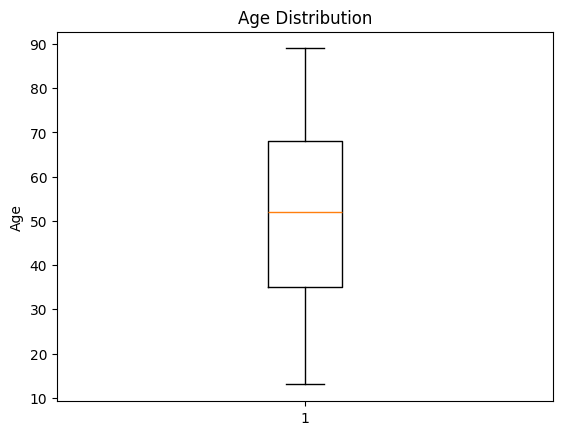

In [38]:
plt.figure()
plt.title('Age Distribution')
plt.ylabel('Age')
plt.boxplot(df['Age'])
plt.show()

In [48]:
# Gender ratio
females = df['Gender'].value_counts()['Female']
males = df['Gender'].value_counts()['Male']
total = females + males
print(f"{(males*100 / total).round(2)}% of patients are male, {(females*100 / total).round(2)}% are female")

50.02% of patients are male, 49.98% are female


In [49]:
# Medical conditions
df['Medical Condition'].describe()

count         54966
unique            6
top       Arthritis
freq           9218
Name: Medical Condition, dtype: object

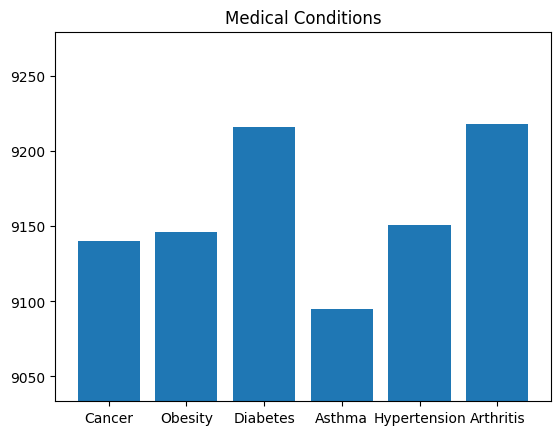

In [80]:
conditions = list(df['Medical Condition'].unique())
counts = [df['Medical Condition'].value_counts()[i] for i in conditions]
high = max(counts)
low = min(counts)

plt.figure()
plt.ylim(low-0.5*(high-low),high+0.5*(high-low))
plt.title('Medical Conditions')
plt.bar(conditions,counts)
plt.show()